In [15]:
from pathlib import Path
from keyword_spotting.utils import (add_noise, play_audio_from_file, play_audio_from_array, 
                                    load_model)
from keyword_spotting.predictions import predict_audio, get_label
from keyword_spotting.feature_extraction.utils import read_wav, extract_features
import pickle
import numpy as np
import matplotlib.pyplot as plt

import os
import scipy.io
import scipy.io.wavfile
import simpleaudio as sa
from keyword_spotting.feature_extraction.utils import read_wav
from scipy.io.wavfile import write

# Data augmentation: Noise adding

In [16]:
def plot_audio(pathaudio):
    sampleRate, audioBuffer = scipy.io.wavfile.read(pathaudio)
    duration = len(audioBuffer)/sampleRate
    time = np.arange(0,duration,1/sampleRate) #time vector
    plt.plot(time,audioBuffer)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    myAudioFilename = pathaudio.name
    plt.title(myAudioFilename)
    plt.show()

In [17]:
DATASET_PATH = Path('/Users/emi/unipd/hda/dataset')

In [18]:
with open(DATASET_PATH / 'X_test.pickle', 'rb') as file:
    wavs = pickle.load(file)

In [19]:
sample_rate, signal = read_wav(DATASET_PATH / wavs[56])
sample_rate_noise, signal_noise = add_noise(sample_rate, signal, DATASET_PATH, random_noise=False, noise_factor=0.5)
write("example_noise.wav", sample_rate_noise, signal_noise.astype(np.int16))

/Users/emi/unipd/hda/hda_keyword_spotting/keyword_spotting/feature_extraction/utils.py:26: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(file)


In [20]:
play_audio_from_array(signal)

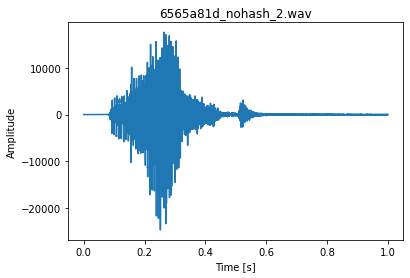

In [21]:
plot_audio(DATASET_PATH / wavs[56])

In [22]:
play_audio_from_array(signal_noise)

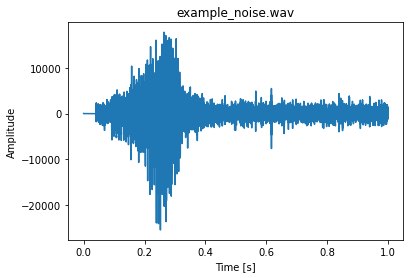

In [23]:
plot_audio(Path('example_noise.wav'))

# Feature extraction

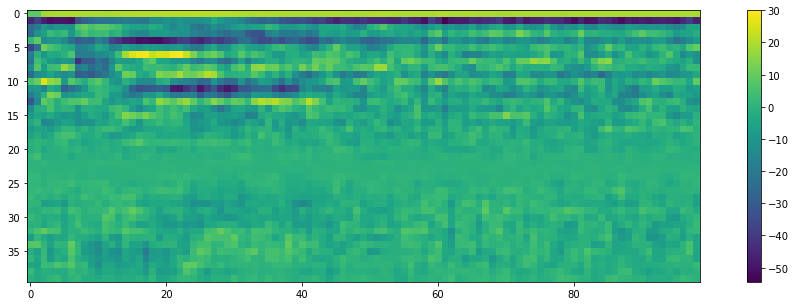

In [24]:
q = extract_features(signal, sample_rate)
fig, ax = plt.subplots(figsize=(17, 5))
image = ax.imshow(q.T)
fig.colorbar(image)

# Predict on an audio 

In [25]:
model = load_model('/Users/emi/unipd/hda/hda_keyword_spotting/models/resnet_res6')

In [26]:
k = 10
sample_rate, signal = read_wav(DATASET_PATH / wavs[k])
wavs[k]

'up/54ad8f22_nohash_0.wav'

In [27]:
get_label(predict_audio(model, signal, sample_rate))

'up'